# Sparse Autoencoder Tutorial

## Introduction

A Sparse Autoencoder is a type of autoencoder that includes a sparsity constraint on the hidden layer. This means that the autoencoder is encouraged to learn an encoding where only a small number of neurons are active at the same time. Sparse autoencoders are useful for learning features from data, similar to how the brain operates with sparse neural activity.

## Architecture

A Sparse Autoencoder consists of the same parts as a regular autoencoder:
1. **Encoder**: Compresses the input into a latent-space representation.
2. **Decoder**: Reconstructs the input from the latent-space representation.

### Encoder

The encoder function, $h = f(x)$, maps the input $x$ to a hidden representation $h$. Mathematically, this can be written as:

$$
h = f(x) = \sigma(Wx + b)
$$

where:
- $W$ is a weight matrix
- $b$ is a bias vector
- $\sigma$ is an activation function (e.g., ReLU, sigmoid)

### Decoder

The decoder function, $\hat{x} = g(h)$, maps the hidden representation $h$ back to the original input space. Mathematically, this can be written as:

$$
\hat{x} = g(h) = \sigma(W'h + b')
$$

where:
- $W'$ is a weight matrix (not necessarily the transpose of $W$)
- $b'$ is a bias vector
- $\sigma$ is an activation function

### Sparsity Constraint

To enforce sparsity, we introduce a sparsity constraint on the hidden activations. One common approach is to enforce that the average activation of each hidden neuron is close to a small value $\rho$. This can be achieved by adding a regularization term to the loss function. The regularization term is often based on the Kullback-Leibler (KL) divergence:

$$
KL(\rho \parallel \hat{\rho}_j) = \rho \log \frac{\rho}{\hat{\rho}_j} + (1 - \rho) \log \frac{1 - \rho}{1 - \hat{\rho}_j}
$$

where $\rho$ is the sparsity parameter (a small value, typically 0.05), and $\hat{\rho}_j$ is the average activation of hidden neuron $j$ over the training set.

### Loss Function

The loss function for a sparse autoencoder includes both the reconstruction error and the sparsity regularization term:

$$
L(x, \hat{x}) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2 + \beta \sum_{j=1}^{m} KL(\rho \parallel \hat{\rho}_j)
$$

where $n$ is the number of input features, $m$ is the number of hidden neurons, and $\beta$ is a weight that controls the importance of the sparsity term.

## Training the Sparse Autoencoder

Training the sparse autoencoder involves minimizing the loss function with respect to the weights and biases of the encoder and decoder. This is typically done using gradient descent.

### Derivatives

Let's derive the gradients for the encoder and decoder weights.

#### Decoder Gradients

For the decoder, the gradient of the loss function with respect to the decoder weights $W'$ is:

$$
\frac{\partial L}{\partial W'} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial W'}
$$

Since $\hat{x} = \sigma(W'h + b')$, we have:

$$
\frac{\partial \hat{x}}{\partial W'} = h \cdot \sigma'(W'h + b')
$$

Thus,

$$
\frac{\partial L}{\partial W'} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot h^T
$$

#### Encoder Gradients

For the encoder, the gradient of the loss function with respect to the encoder weights $W$ is:

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial h} \cdot \frac{\partial h}{\partial W}
$$

Since $h = \sigma(Wx + b)$ and $\hat{\rho}_j = \frac{1}{N} \sum_{i=1}^{N} h_j^{(i)}$, we have:

$$
\frac{\partial L}{\partial h} = \frac{\partial L}{\partial \hat{x}} \cdot \frac{\partial \hat{x}}{\partial h} + \beta \sum_{j=1}^{m} \frac{\partial KL(\rho \parallel \hat{\rho}_j)}{\partial h}
$$

The first term is similar to the regular autoencoder:

$$
\frac{\partial L}{\partial h} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T
$$

The second term is the gradient of the KL divergence term:

$$
\frac{\partial KL(\rho \parallel \hat{\rho}_j)}{\partial h_j} = -\frac{\rho}{\hat{\rho}_j} + \frac{1 - \rho}{1 - \hat{\rho}_j}
$$

Thus,

$$
\frac{\partial L}{\partial h} = (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T + \beta \left( -\frac{\rho}{\hat{\rho}} + \frac{1 - \rho}{1 - \hat{\rho}} \right)
$$

And,

$$
\frac{\partial h}{\partial W} = x \cdot \sigma'(Wx + b)
$$

Thus,

$$
\frac{\partial L}{\partial W} = \left[ (x - \hat{x}) \cdot \sigma'(W'h + b') \cdot W'^T + \beta \left( -\frac{\rho}{\hat{\rho}} + \frac{1 - \rho}{1 - \hat{\rho}} \right) \right] \cdot x^T \cdot \sigma'(Wx + b)
$$

### Gradient Descent Update

The weights and biases are updated using the gradients:

$$
W \leftarrow W - \eta \frac{\partial L}{\partial W}
$$

$$
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$

where $\eta$ is the learning rate.

##  Example

Let's consider a simple  example using Python and Keras to illustrate how a sparse autoencoder works. We'll use the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits.






11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 8s 22ms/step - loss: 0.2596 - val_loss: 0.1757
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1559 - val_loss: 0.1392
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1318 - val_loss: 0.1225
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1185 - val_loss: 0.1120
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1090 - val_loss: 0.1042
Epoch 6/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1027 - val_loss: 0.0994
Epoch 7/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0987 - val_loss: 0.0961
Epoch 8/50
235/235 [==============================] - 4s 19ms/step - loss: 0.0958 - val_loss: 0.0938
Epoch 9/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0937 - val_loss: 0.0920
Epoch 10/50
235/235 [=====

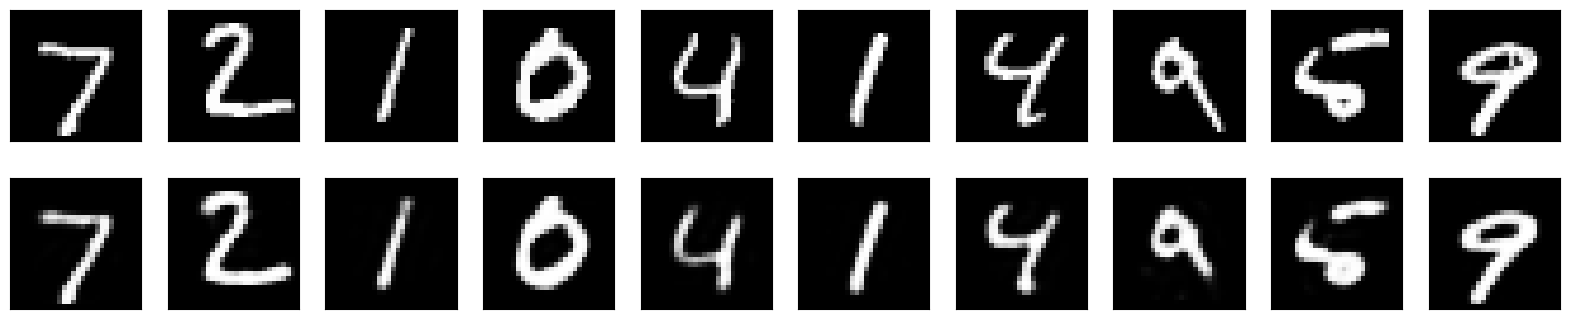

In [ ]:

import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras import regularizers

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the sparse autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Compile the autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display original and reconstructed images
import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()